# EDA-Project

**Вопросы:**

    1. Что влияет на цену жилья?
    2. Какая разница в цене аренды и итоговой с учетом всех страховок?
    3. Каких домов больше всего? (Сколько комнатных? С животными или без? С мебелью или без?)

In [1]:
# Импорт нужных пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Чтение данных 
or_rent=pd.read_csv('houses_to_rent.csv')
rent=or_rent.copy()
rent.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
# Удаление ненужного столбца и oбщая информация о данных
rent.drop('Unnamed: 0',axis=1,inplace=True)
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


In [4]:
# Узнать все ли данные содержать валюту в последних 5 столбцах
for column in rent.columns[-5:]:
    print(f'{column} NaN:', sum([True for i in rent[column] if not(i.startswith('R$'))]))
    print(f'{column} NaN:', set([i for i in rent[column] if not(i.startswith('R$'))]),'\n')

hoa NaN: 202
hoa NaN: {'Sem info', 'Incluso'} 

rent amount NaN: 0
rent amount NaN: set() 

property tax NaN: 27
property tax NaN: {'Incluso'} 

fire insurance NaN: 0
fire insurance NaN: set() 

total NaN: 0
total NaN: set() 



In [5]:
# Создание столбца с валютой
rent['currency']='R$'

# Удаление 'R$' и ','
for column in rent.columns[-6:-1]:
    rent[column]=[i.replace('R$','').replace(',','') if i.startswith('R$') else i for i in rent[column]]
    
# Создание новых сталбцов для 'hoa' и 'property tax' с их состоянием    
rent['hoa state']=(np.select([rent['hoa'].eq('0'), rent['hoa'].eq('Incluso'), rent['hoa'].eq('Sem info')],
                             ['no', 'included', np.nan], 'yes'))

rent['property tax state']=(np.select([rent['property tax'].eq('0'), rent['property tax'].eq('Incluso')],
                             ['no', 'included'], 'yes'))

# Замена "-" на 0 в "floor"
rent.loc[rent['floor'] == '-', 'floor'] = 0
rent['floor']=rent['floor'].astype(int)

# Изменение типа данных str -> int
for column in rent.columns[-8:-3]:
    if column=='hoa':
        rent.loc[rent[column] == 'Incluso', column] = 0
        rent.loc[rent[column] == 'Sem info', column] = np.nan
    elif column=='property tax':
        rent.loc[rent[column] == 'Incluso', column] = 0
    rent[column]=[int(i) if type(i)==str else i for i in rent[column]]

# Реорганизация столбцов
columns = rent.columns.tolist()
order = [0,1,2,3,4,5,6,7,8,14,9,10,15,11,12,13]
rent = rent[[columns[i] for i in order]]

# Резервная копия строк без данных
print('Total rows =', len(rent.index))
nan_rent = rent[rent.isna().any(axis=1)]
print('NaN rows=', len(nan_rent.index))

# Удалила NaN, чтобы получить более точные данные, так как количество NaN не критично
rent = rent.dropna()
rent['hoa']=[int(i) for i in rent['hoa']]
print('Clean data rows =', len(rent.index),'\n')

rent.info()

Total rows = 6080
NaN rows= 119
Clean data rows = 5961 

<class 'pandas.core.frame.DataFrame'>
Index: 5961 entries, 0 to 6079
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   city                5961 non-null   int64 
 1   area                5961 non-null   int64 
 2   rooms               5961 non-null   int64 
 3   bathroom            5961 non-null   int64 
 4   parking spaces      5961 non-null   int64 
 5   floor               5961 non-null   int64 
 6   animal              5961 non-null   object
 7   furniture           5961 non-null   object
 8   hoa                 5961 non-null   int64 
 9   hoa state           5961 non-null   object
 10  rent amount         5961 non-null   int64 
 11  property tax        5961 non-null   int64 
 12  property tax state  5961 non-null   object
 13  fire insurance      5961 non-null   int64 
 14  total               5961 non-null   int64 
 15  currency            

In [6]:
# Данные после обработки
rent.tail(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,hoa state,rent amount,property tax,property tax state,fire insurance,total,currency
6070,1,200,4,5,3,2,acept,not furnished,2600,yes,4500,834,yes,58,7992,R$
6071,0,600,5,5,4,0,acept,not furnished,3300,yes,5000,916,yes,76,9292,R$
6072,1,200,4,4,4,21,acept,furnished,2000,yes,10000,862,yes,127,12990,R$
6073,1,88,2,2,1,1,acept,not furnished,1200,yes,6000,0,no,77,7277,R$
6074,0,28,1,1,0,0,not acept,furnished,0,no,1390,0,no,18,1408,R$
6075,1,50,2,1,1,2,acept,not furnished,420,yes,1150,0,no,15,1585,R$
6076,1,84,2,2,1,16,not acept,furnished,768,yes,2900,63,yes,37,3768,R$
6077,0,48,1,1,0,13,acept,not furnished,250,yes,950,42,yes,13,1255,R$
6078,1,160,3,2,2,0,not acept,not furnished,0,no,3500,250,yes,53,3803,R$
6079,1,60,2,1,1,4,acept,furnished,489,yes,1900,0,no,25,2414,R$


In [7]:
# Общее описание данных
rent.describe()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,0.862271,150.382318,2.487334,2.337527,1.745345,5.778225,1110.154840,4387.578426,493.610804,57.932226,6049.667170
std,0.344644,378.646470,1.123221,1.435813,1.583760,6.178970,4017.906783,3572.216210,6273.856426,49.153500,8818.732461
min,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,1.000000,180.000000,1800.000000,34.000000,23.000000,2469.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,4.000000,670.000000,3100.000000,145.000000,40.000000,4127.000000
75%,1.000000,198.000000,3.000000,3.000000,2.000000,9.000000,1480.000000,5900.000000,459.000000,77.000000,8080.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [8]:
# Поделила на 5 группы общую сумму от дешовых к дорогим
total_min = rent[rent['total'] < 3000]
print('The amount of houses with total rent lower than 3000R$ is', len(total_min),'\n')

total_low_mid = rent[(rent['total']>3000) & (rent['total']<6000)]
print('The amount of houses with total rent higher than 3000R$ but lower than 6000R$ is', len(total_low_mid),'\n')

total_high_mid = rent[(rent['total']>6000) & (rent['total']<10000)]
print('The amount of houses with total rent higher than 6000R$ but lower than 10,000R$ is', len(total_high_mid),'\n')

total_max = rent[(rent['total']>10000) & (rent['total']<50000)]
print('The amount of houses with total rent higher than 10,000R$ but lower than 50,000R$ is', len(total_max),'\n')

total_ultra_max = rent[rent['total']>50000]
print('The amount of houses with total rent higher than 50,000R$ is', len(total_ultra_max))

The amount of houses with total rent lower than 3000R$ is 2059 

The amount of houses with total rent higher than 3000R$ but lower than 6000R$ is 1818 

The amount of houses with total rent higher than 6000R$ but lower than 10,000R$ is 1041 

The amount of houses with total rent higher than 10,000R$ but lower than 50,000R$ is 1033 

The amount of houses with total rent higher than 50,000R$ is 5


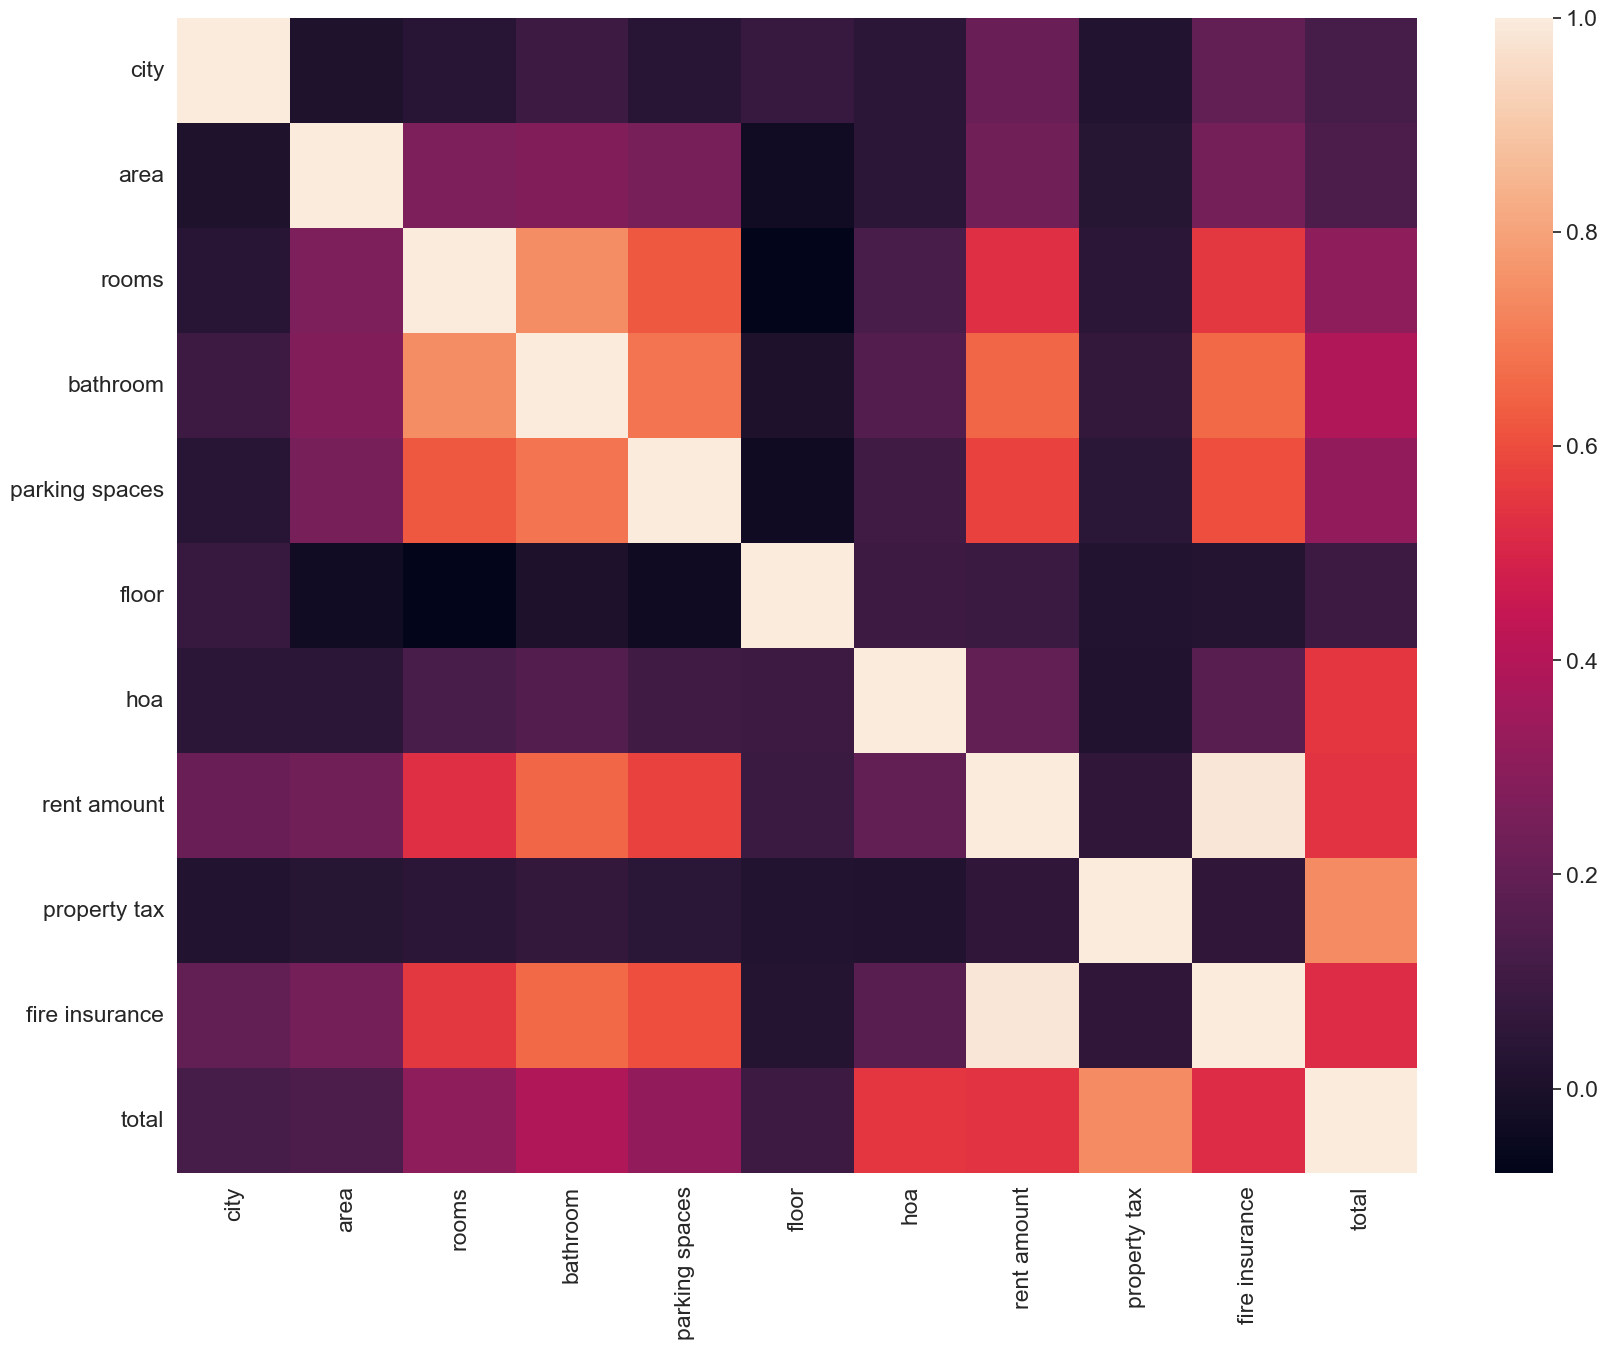

In [9]:
# Kорреляция
rent_corr = rent.corr(numeric_only=True)
sns.set(font_scale=1.5);
plt.subplots(figsize=(20,15))
hm=sns.heatmap(rent_corr);

1. Что влияет на цену жилья?

	- На общую стоимость жилья влияет hoa, rent amount, property tax и fire insurance. В свою очередь, fire insurance и rent amount имеют прямую связь, и зависимы от количества комнат, парковочных мест и ванных комнат.

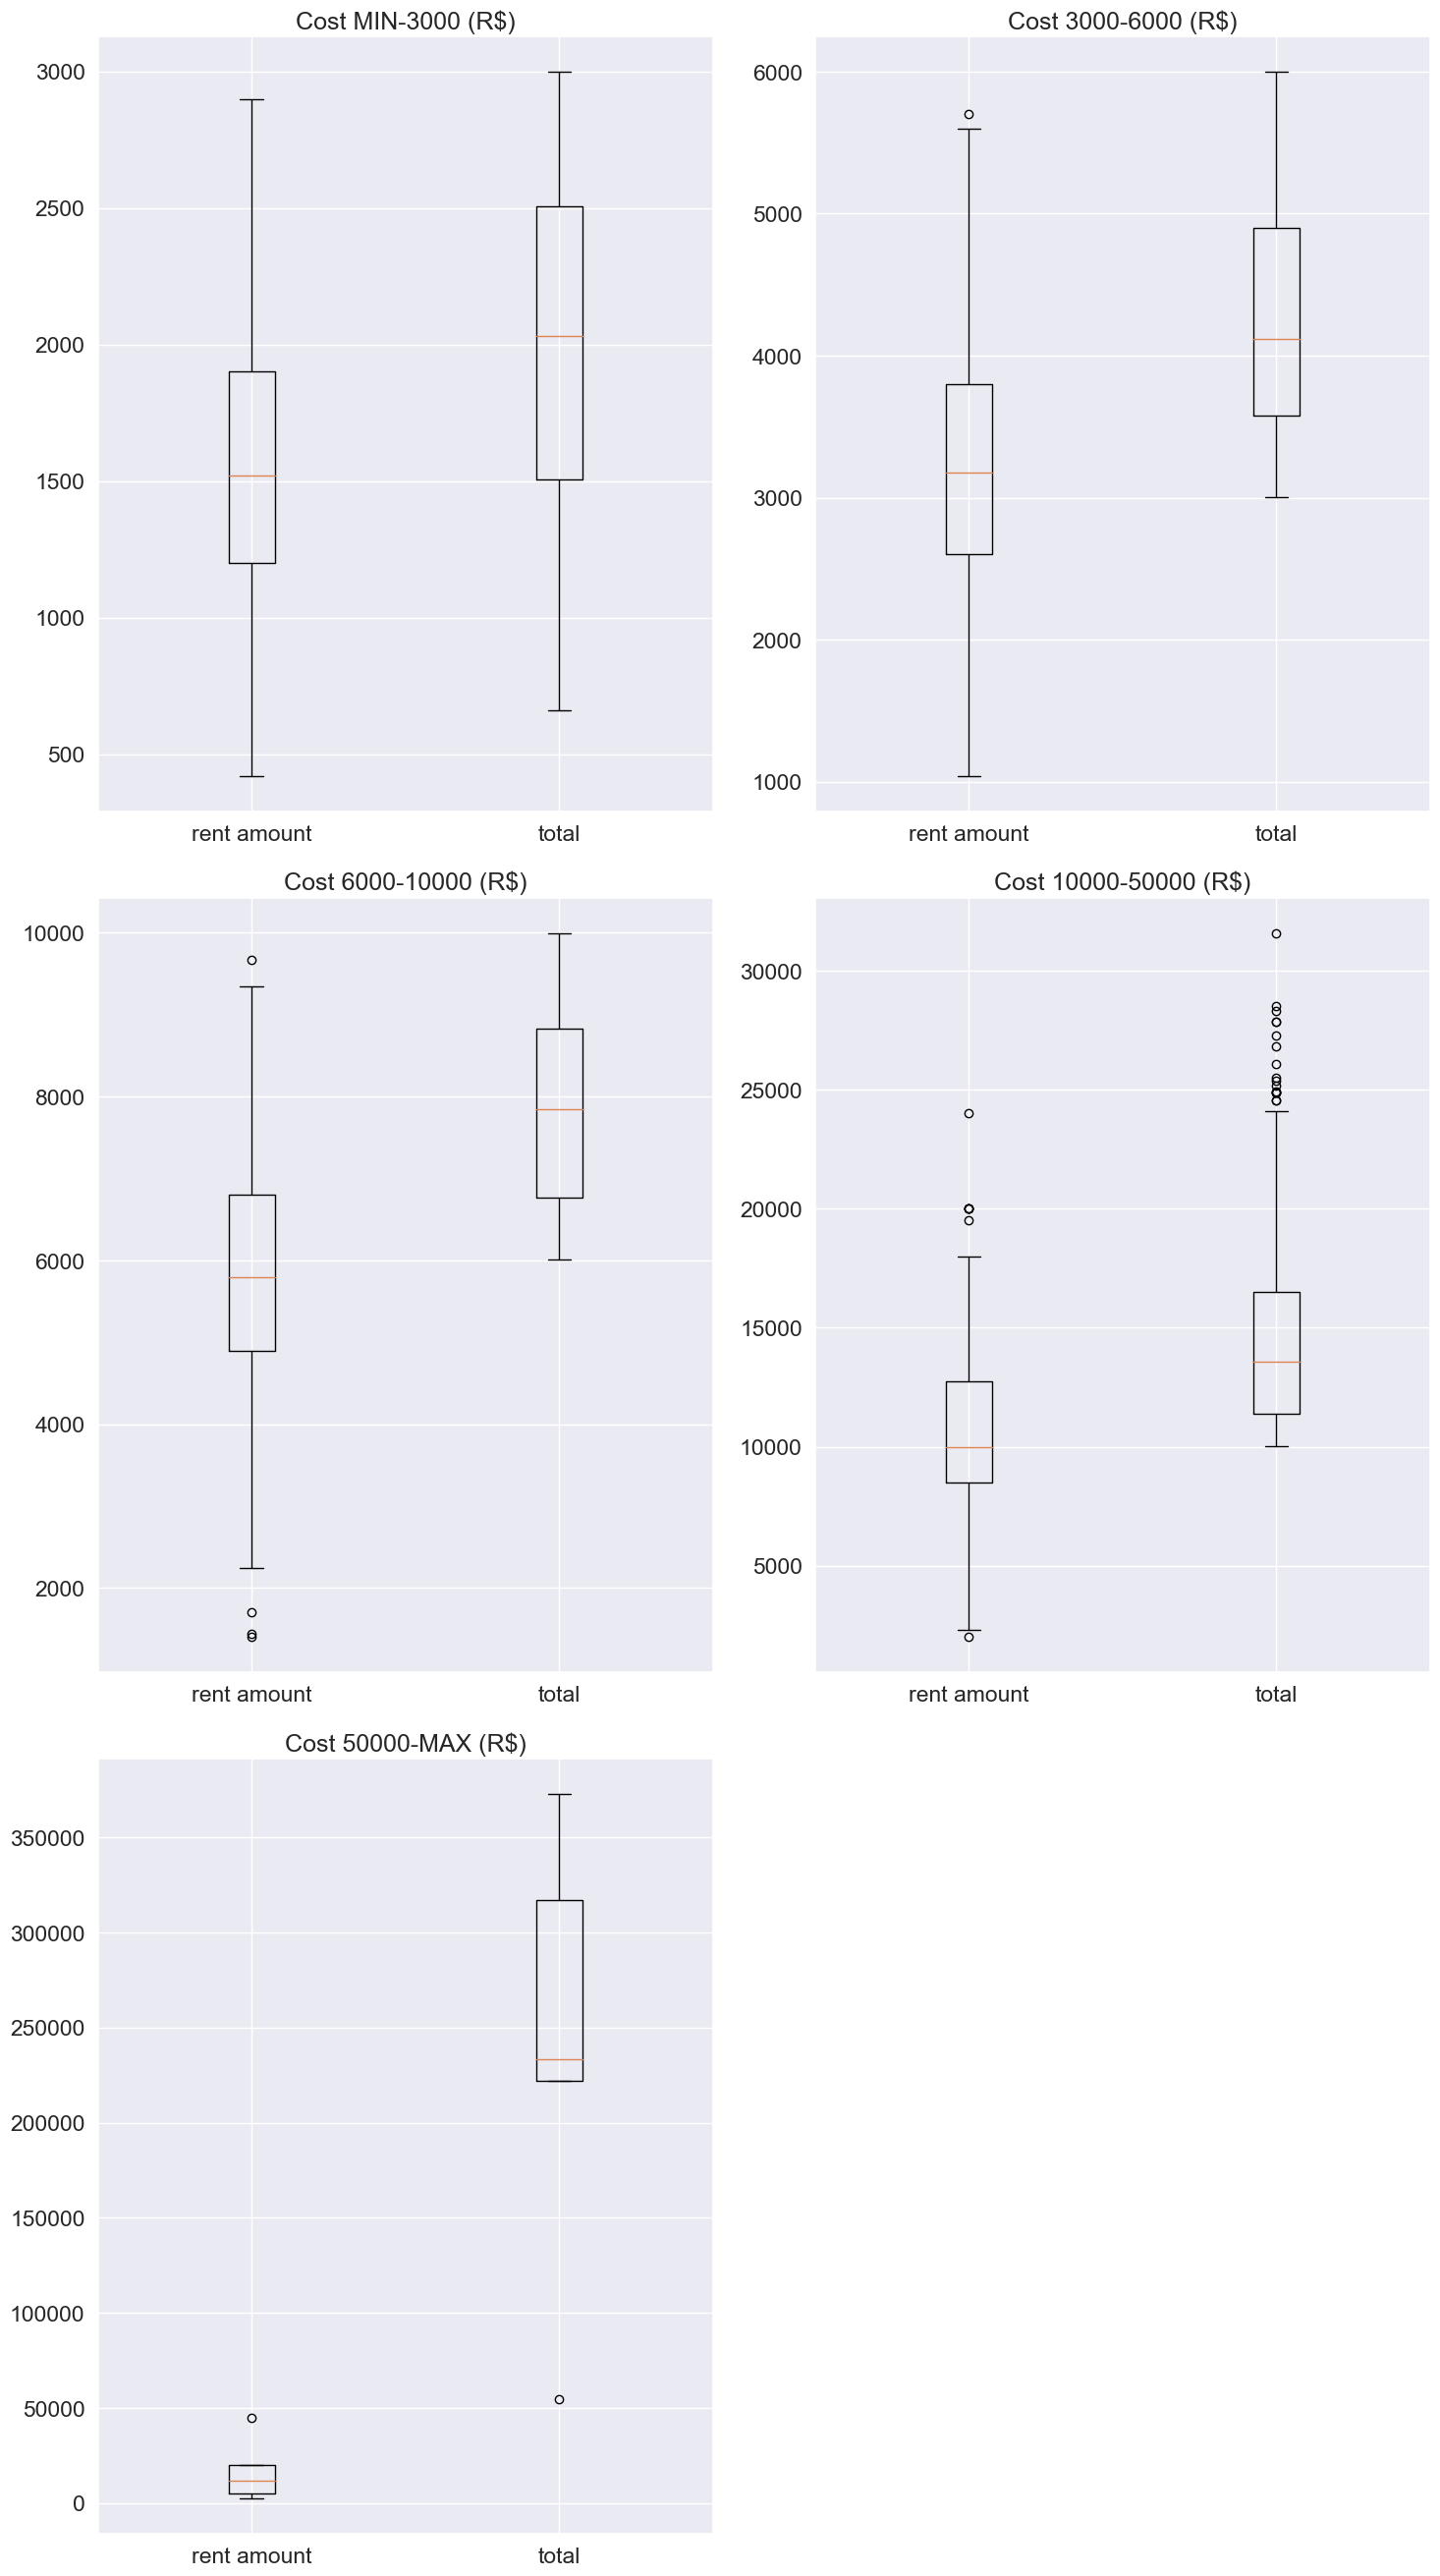

In [10]:
# Проверка разницы цен изначальной аренды и итоговой. 
rent_cost = {'Cost MIN-3000 (R$)':[total_min['rent amount'],total_min['total']],
             'Cost 3000-6000 (R$)':[total_low_mid['rent amount'],total_low_mid['total']],
             'Cost 6000-10000 (R$)':[total_high_mid['rent amount'],total_high_mid['total']],
             'Cost 10000-50000 (R$)':[total_max['rent amount'],total_max['total']],
             'Cost 50000-MAX (R$)':[total_ultra_max['rent amount'],total_ultra_max['total']]}

sns.set(font_scale=1.5, style='darkgrid');
axs=[]
fig=plt.figure(figsize=(15,35))
for i in range(1,6):
    axs.append(fig.add_subplot(4,2,i))
for ax, key, value in zip(axs, rent_cost.keys(), rent_cost.values()):
    ax.boxplot(value);
    ax.set_xticklabels(['rent amount','total']);
    ax.set_title(key);
fig.tight_layout()

2. Какая разница в цене аренды и итоговой с учетом всех страховок?

	- По графику заметно, что чем выше итоговая цена, тем больше в нее включена стоимость страховок и дополнительных услуг.
	- Дома стоимостью до 3000 R$: дополнительно к аренде в среднем прибавляется 300 - 600 R$.
	- Дома стоимостью  3000 - 6000 R$: дополнительно к аренде в среднем прибавляется 1000 R$.
	- Дома стоимостью 6000 - 10000 R$: дополнительно к аренде в среднем прибавляется 2000 R$.
	- Дома стоимостью 10000 - 50000R$: дополнительно к аренде в среднем прибавляется 4000 R$.
	- Считаю, что дома дороже 50 000 являются аномалией так, как разница аренды с итоговой стоимостью выше 220 000.

In [11]:
# Определила пустые данные чтобы не визуализировать их в дальнейшем
rent_group = {'min':total_min, 'low_mid':total_low_mid,'high_mid':total_high_mid,'max':total_max, 'ultra_max':total_ultra_max}
furniture = ['furnished', 'not furnished']

for key, value in rent_group.items():
        for furn in furniture:
            for i in range(1,11):
                if value[(value['rooms']==i) & (value['furniture']==furn)].empty:
                    print(f'{key} with {i} rooms and {furn} is empty')
        print('\n')

min with 4 rooms and furnished is empty
min with 5 rooms and furnished is empty
min with 6 rooms and furnished is empty
min with 7 rooms and furnished is empty
min with 8 rooms and furnished is empty
min with 9 rooms and furnished is empty
min with 10 rooms and furnished is empty
min with 7 rooms and not furnished is empty
min with 8 rooms and not furnished is empty
min with 9 rooms and not furnished is empty
min with 10 rooms and not furnished is empty


low_mid with 6 rooms and furnished is empty
low_mid with 7 rooms and furnished is empty
low_mid with 8 rooms and furnished is empty
low_mid with 9 rooms and furnished is empty
low_mid with 10 rooms and furnished is empty
low_mid with 8 rooms and not furnished is empty
low_mid with 9 rooms and not furnished is empty
low_mid with 10 rooms and not furnished is empty


high_mid with 6 rooms and furnished is empty
high_mid with 8 rooms and furnished is empty
high_mid with 9 rooms and furnished is empty
high_mid with 10 rooms and furnished 

/opt/homebrew/Caskroom/miniforge/base/envs/env_py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/cc/34r92vhx2ys6l6fg4n8l_0jm0000gn/T/ipykernel_1727/3810210076.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


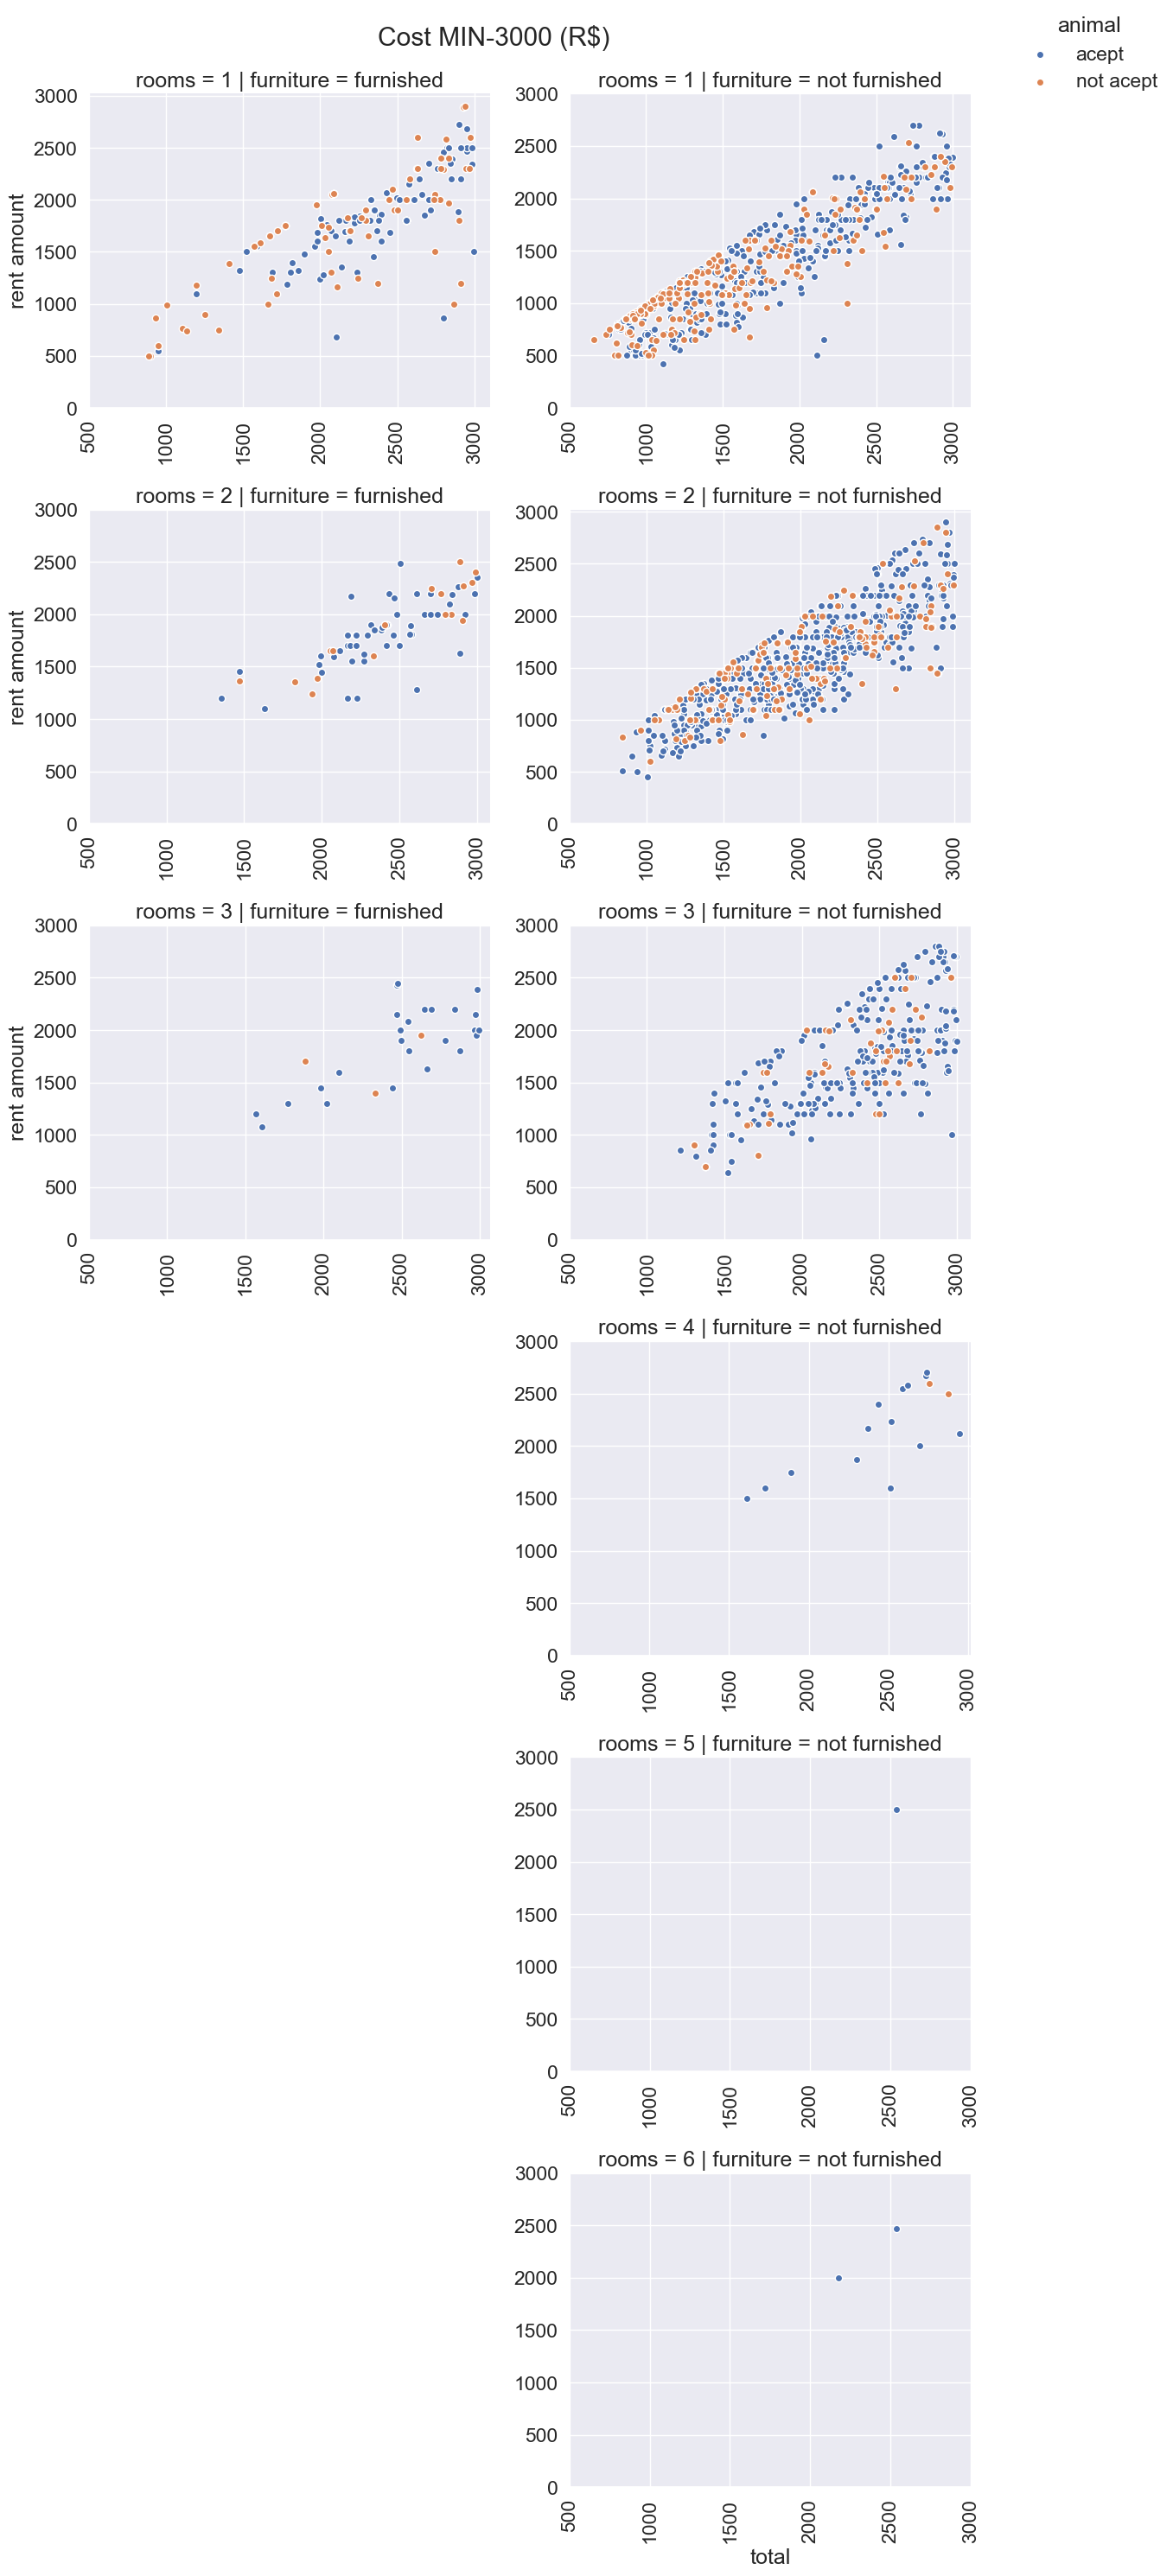

In [12]:
# Cost MIN-3000 (R$)
g=sns.FacetGrid(total_min, col='furniture', col_order=['furnished','not furnished'], row='rooms',hue='animal', hue_order=['acept','not acept'], sharex=False, sharey=False, height=5, aspect=1);

g.map_dataframe(plt.scatter, x='total', y='rent amount', edgecolor='w');
g.set(xticks=np.arange(500,3100,500), yticks=np.arange(0,3100,500));
g.set_xticklabels(np.arange(500,3100,500), rotation=90);
g.add_legend()
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
g.fig.suptitle('Cost MIN-3000 (R$)', y=0.99)
g.fig.delaxes(g.axes[3, 0])
g.fig.delaxes(g.axes[4, 0])
g.fig.delaxes(g.axes[5, 0])
plt.tight_layout()

/opt/homebrew/Caskroom/miniforge/base/envs/env_py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/cc/34r92vhx2ys6l6fg4n8l_0jm0000gn/T/ipykernel_1727/1199117935.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


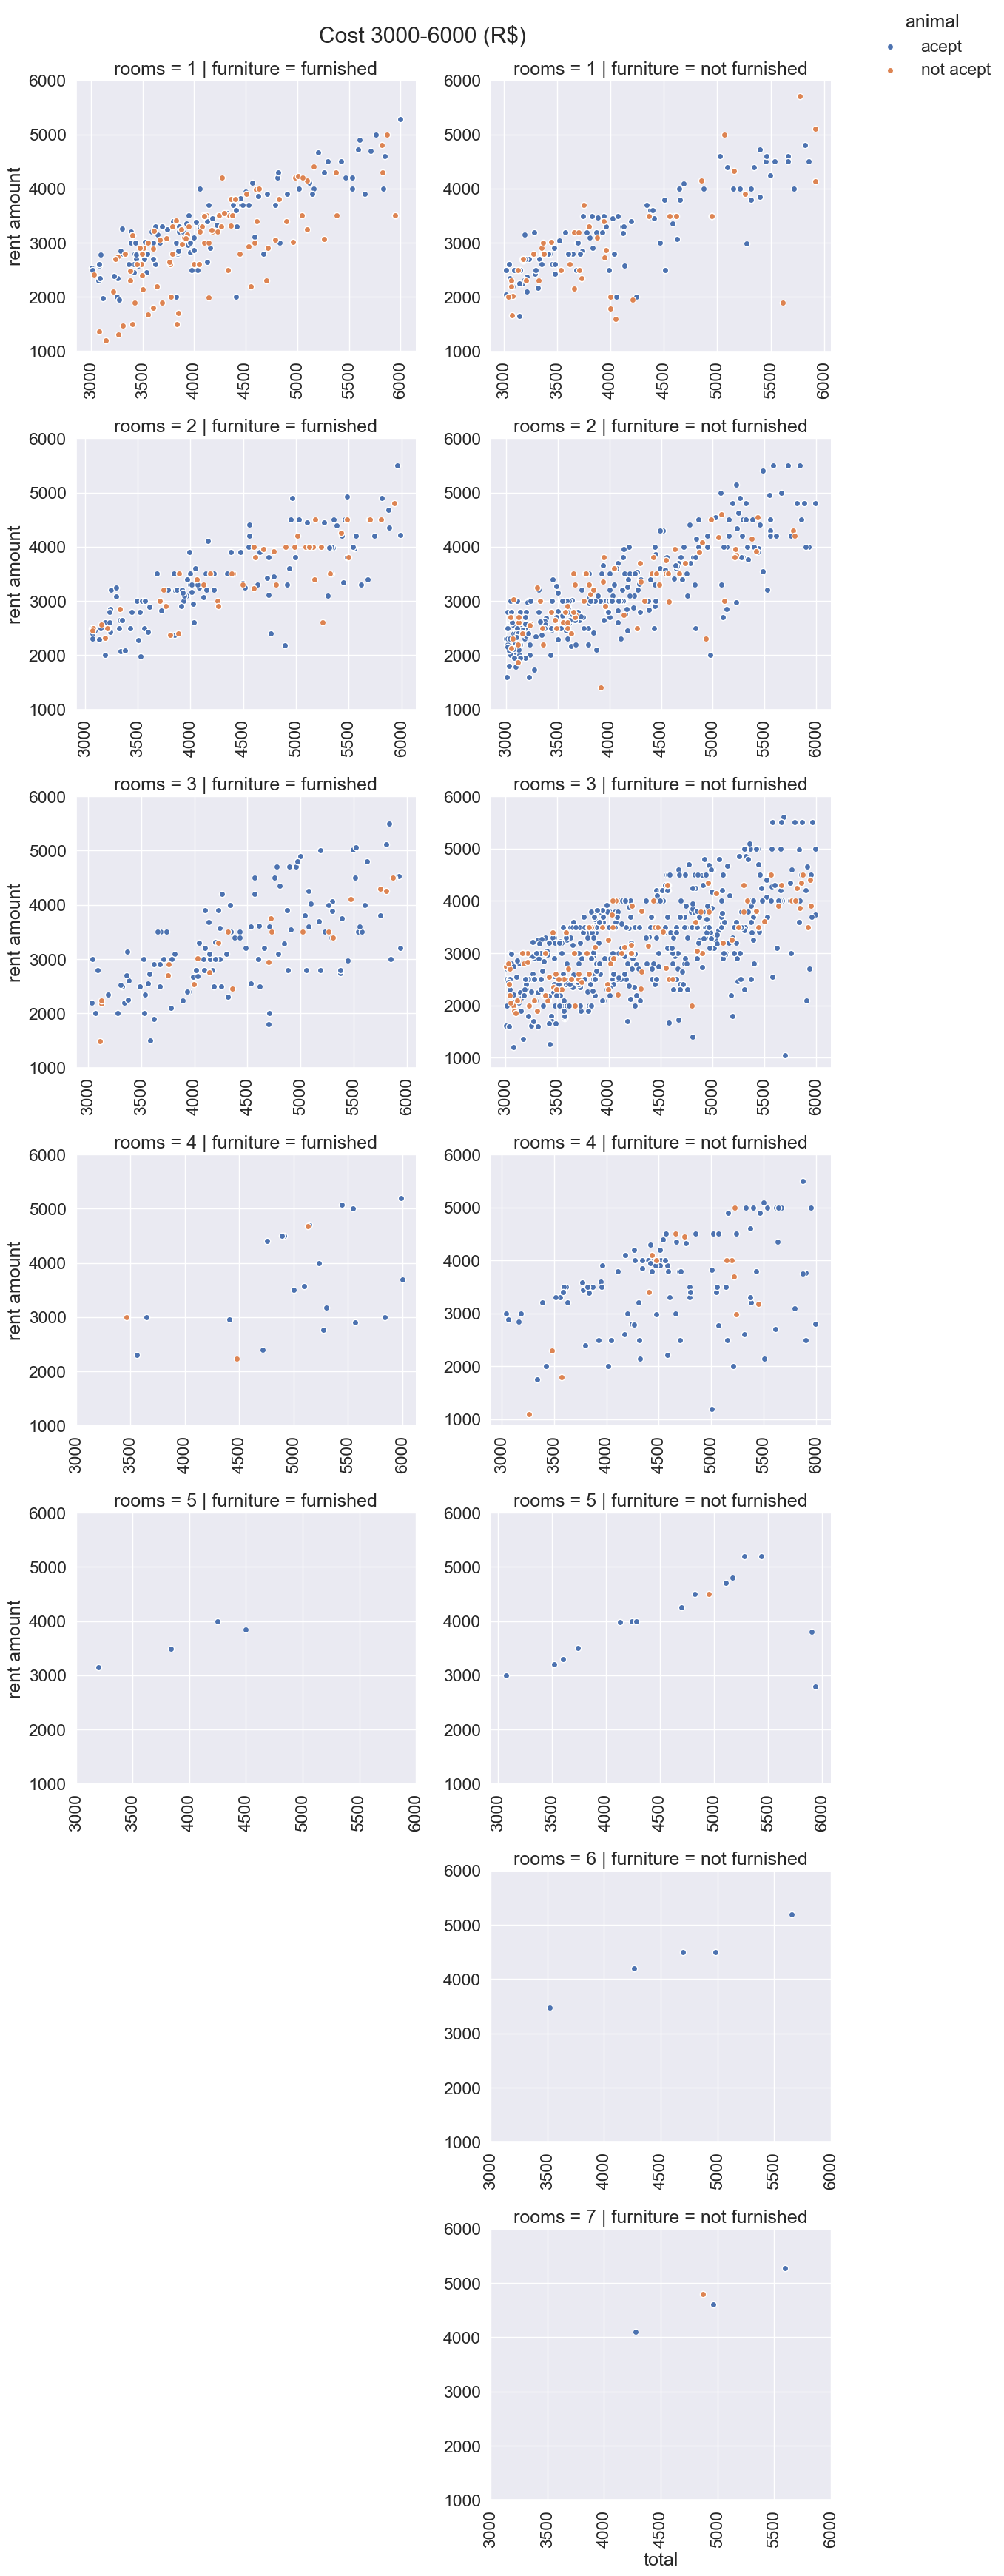

In [13]:
# Cost 3000-6000 (R$)
g=sns.FacetGrid(total_low_mid, col='furniture', col_order=['furnished','not furnished'], row='rooms',hue='animal', hue_order=['acept','not acept'], sharex=False, sharey=False, height=5, aspect=1);
g.map_dataframe(plt.scatter, x='total', y='rent amount', edgecolor='w');
g.set(xticks=np.arange(3000,6100,500), yticks=np.arange(1000,6100,1000));
g.set_xticklabels(np.arange(3000,6100,500), rotation=90);
g.add_legend();
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
g.fig.suptitle('Cost 3000-6000 (R$)', y=0.99)
g.fig.delaxes(g.axes[5, 0])
g.fig.delaxes(g.axes[6, 0])
plt.tight_layout()

/opt/homebrew/Caskroom/miniforge/base/envs/env_py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/cc/34r92vhx2ys6l6fg4n8l_0jm0000gn/T/ipykernel_1727/3492107934.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


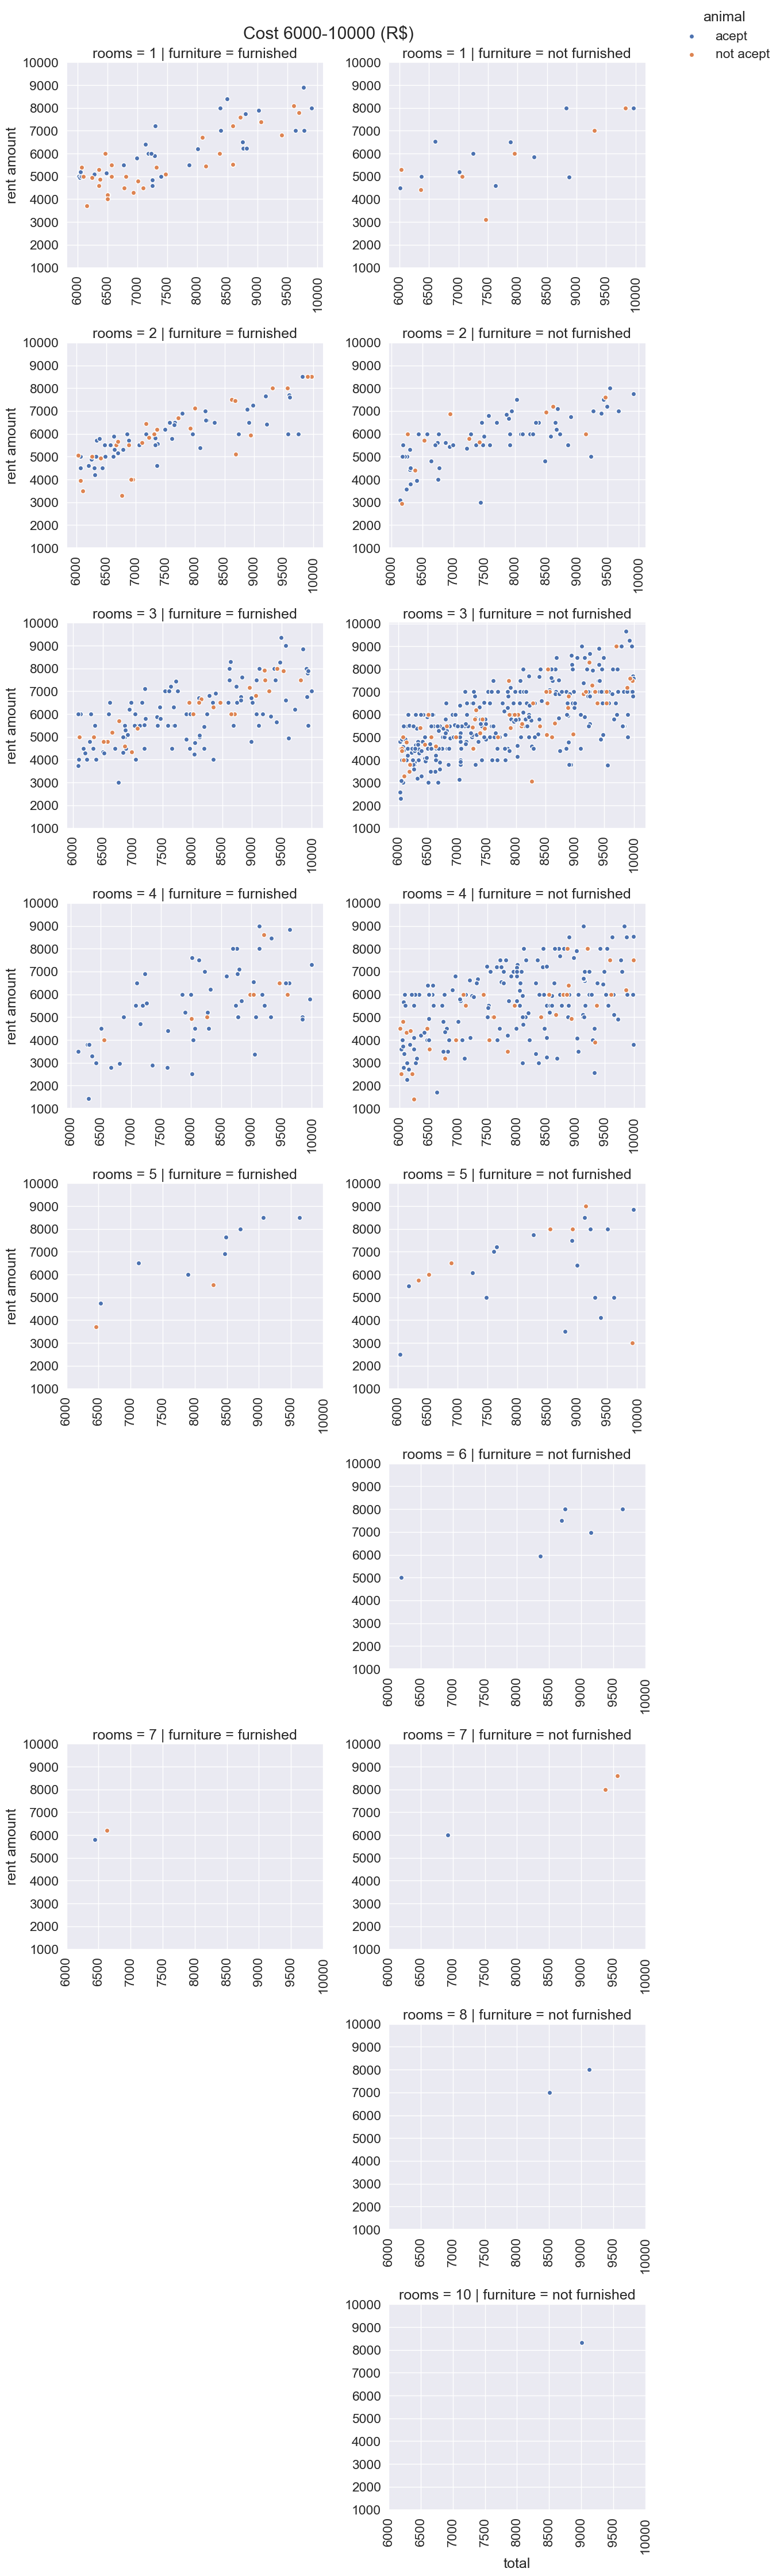

In [14]:
# Cost 6000-10000 (R$)
g=sns.FacetGrid(total_high_mid, col='furniture', col_order=['furnished','not furnished'], row='rooms',hue='animal', hue_order=['acept','not acept'],sharex=False, sharey=False, height=5, aspect=1);
g.map_dataframe(plt.scatter, x='total', y='rent amount', edgecolor='w');
g.set(xticks=np.arange(6000,10100,500), yticks=np.arange(1000,10100,1000));
g.set_xticklabels(np.arange(6000,10100,500), rotation=90);
g.add_legend();
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
g.fig.suptitle('Cost 6000-10000 (R$)', y=0.99)
g.fig.delaxes(g.axes[5, 0])
g.fig.delaxes(g.axes[7, 0])
g.fig.delaxes(g.axes[8, 0])
plt.tight_layout()

/opt/homebrew/Caskroom/miniforge/base/envs/env_py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/cc/34r92vhx2ys6l6fg4n8l_0jm0000gn/T/ipykernel_1727/695008141.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


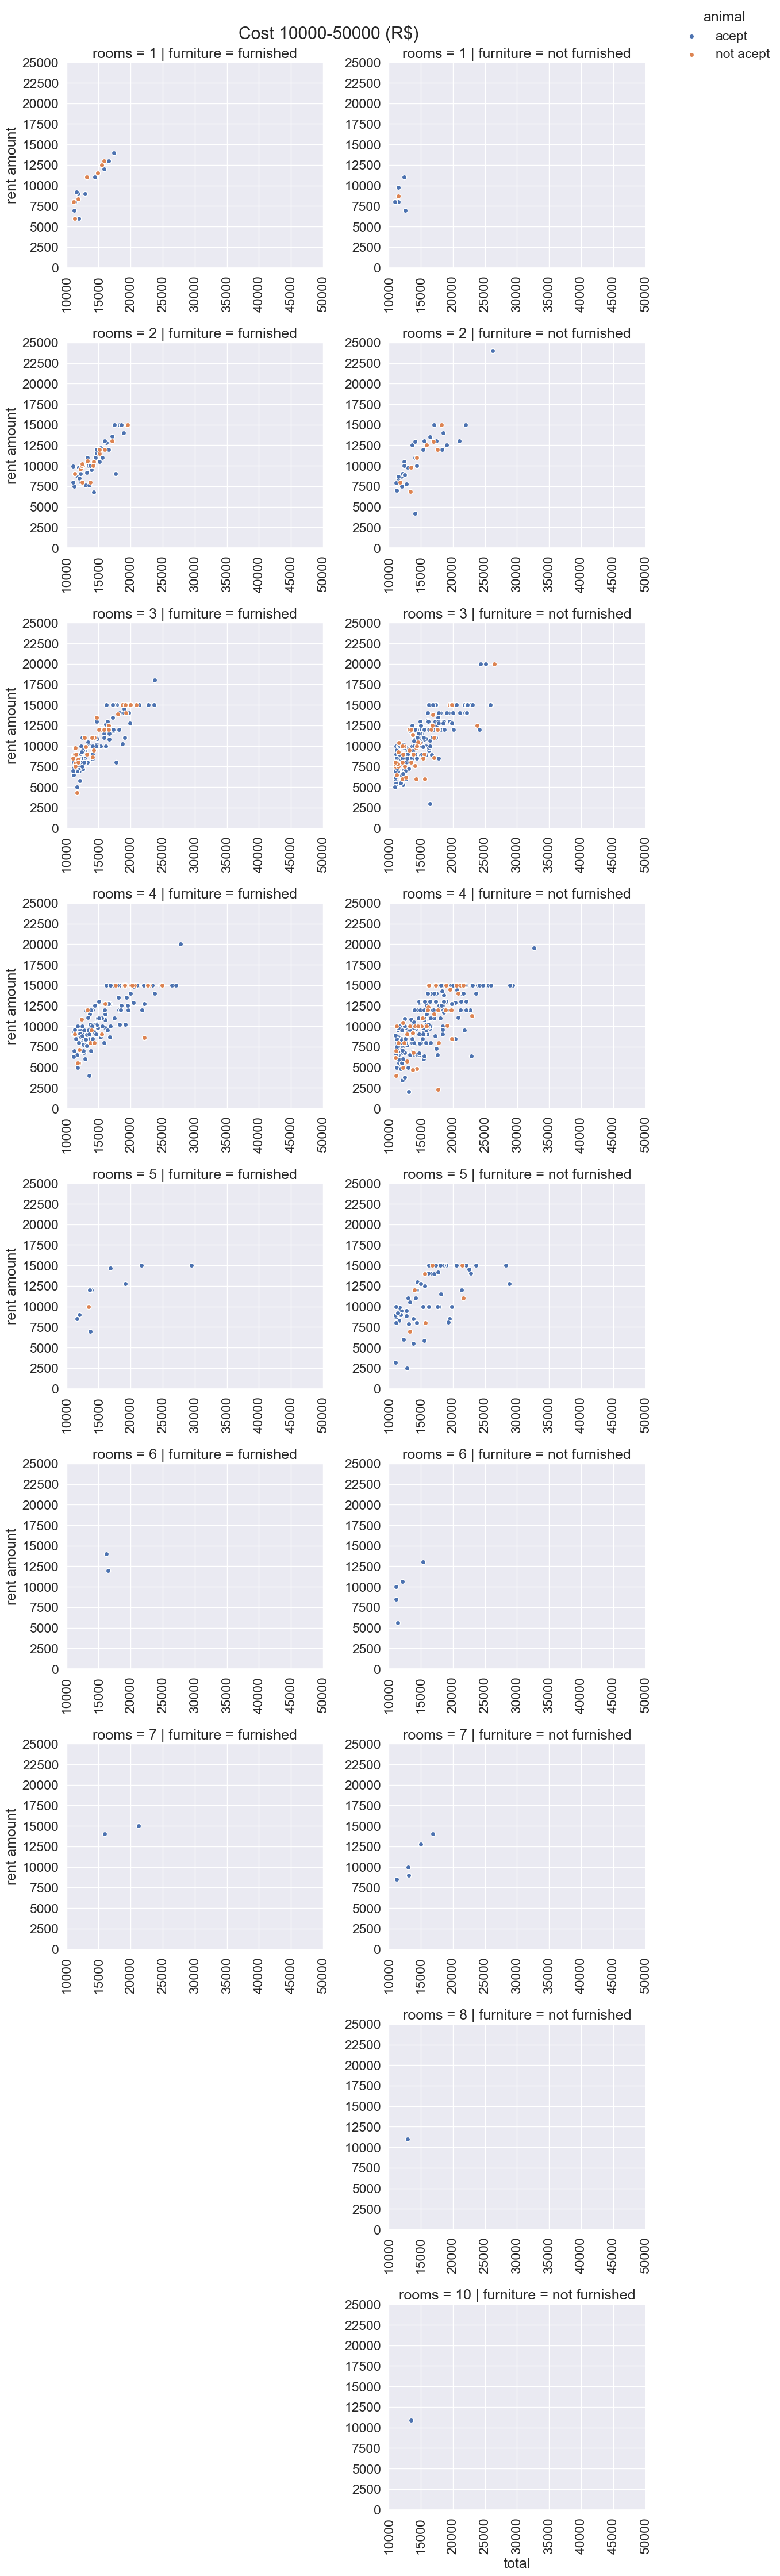

In [15]:
# Cost 10000-50000 (R$)
g=sns.FacetGrid(total_max, col='furniture', col_order=['furnished','not furnished'], row='rooms',hue='animal', hue_order=['acept','not acept'], sharex=False, sharey=False, height=5, aspect=1);
g.map_dataframe(plt.scatter, x='total', y='rent amount', edgecolor='w');
g.set(xticks=np.arange(9000,50100,5000), yticks=np.arange(0,25100,2500));
g.set_xticklabels(np.arange(10000,50100,5000), rotation=90);
g.add_legend();
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
g.fig.suptitle('Cost 10000-50000 (R$)', y=0.99)
g.fig.delaxes(g.axes[7, 0])
g.fig.delaxes(g.axes[8, 0])
plt.tight_layout()

/opt/homebrew/Caskroom/miniforge/base/envs/env_py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/cc/34r92vhx2ys6l6fg4n8l_0jm0000gn/T/ipykernel_1727/483196795.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


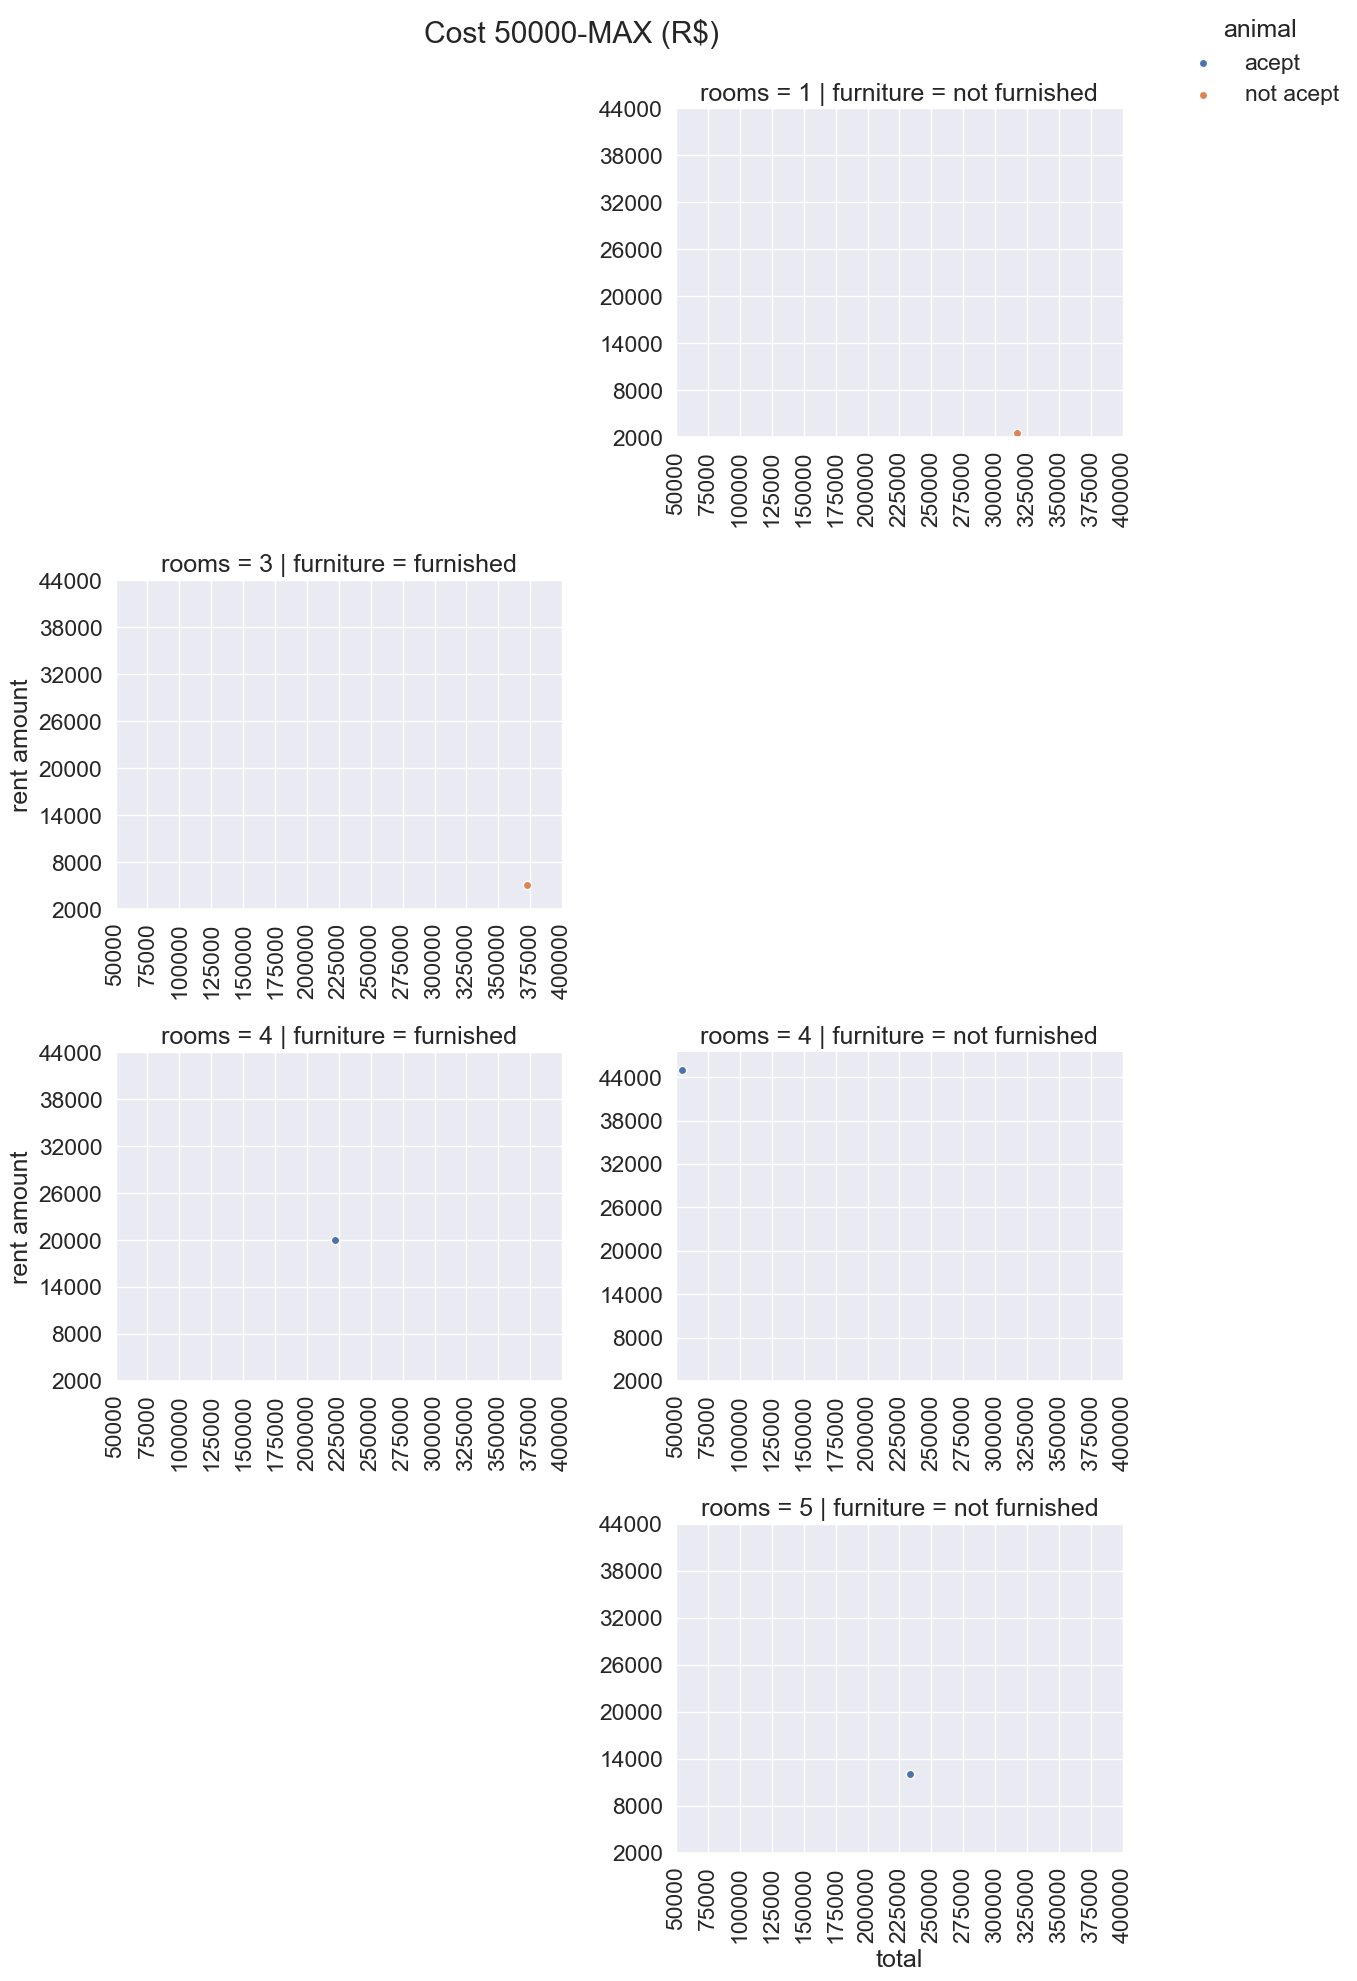

In [16]:
# Cost 50000-MAX (R$)
g=sns.FacetGrid(total_ultra_max, col='furniture', col_order=['furnished','not furnished'], row='rooms',hue='animal', hue_order=['acept','not acept'],sharex=False, sharey=False, height=5, aspect=1);
g.map_dataframe(plt.scatter, x='total', y='rent amount', edgecolor='w');
g.set(xticks=np.arange(50000,400100,25000), yticks=np.arange(2000,44100,6000));
g.set_xticklabels(np.arange(50000,400100,25000), rotation=90);
g.add_legend();
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
g.fig.suptitle('Cost 50000-MAX (R$)', y=0.99)
g.fig.delaxes(g.axes[0, 0])
g.fig.delaxes(g.axes[1, 1])
g.fig.delaxes(g.axes[3, 0])
plt.tight_layout()

3. Каких домов больше всего? 
	
	- Дома стоимостью до 3000 R$: Больше всего домов 1-3 комнатных, без мебели. Домов 4-6 комнатных с мебелью не имеется. Большинство домов приветствуют животных. Домов 4-6 комнатных очень мало.
	- Дома стоимостью  3000 - 6000 R$: Больше всего домов 2-3 комнатных, без мебели. Домов 6-7 комнатами, меблированных не имеется. Большинство домов приветствуют животных. За 3000 - 6000 R$, вариантов меблированных, 1-3 комнатных домов больше, чем среди домов, стоимостью меньше 3000 R$. Домов 5-7 комнатных очень мало.
	- Дома стоимостью 6000 - 10000 R$: Больше всего домов 3-4 комнатных, без мебели. Вариантов 1-2 мало, 5-8 и 10 комнатных еще меньше. 9 комнатных домов не имеется так же, как и 6, 8 и 10 комнатных с мебелью. Домов, где разрешено держать домашних животных намного больше.
	- Дома стоимостью 10000 - 50000R$: По графику видно, что дома стоят в районе 10000 - 30000 R$. Больше всего домов с 3-4 комнатами. Запрет на содержание животных, тут чуть выше, чем в других домах стоимостью ниже. Меньше всего вариантов среди 6-8, и 10 комнатных домов. 9 комнатных, 8 и 10 комнатных с мебелью не имеется.
	- Дома стоимостью выше 50000R$: По графику видно аномалию.